<a href="https://colab.research.google.com/github/FazleRabbbiferdaus172/machine_learning/blob/master/perceptron_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hand coded perceptron learning

The Perceptron learning class

In [ ]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------

    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassification (updates) in each epoch.
    """

    def __init__(self, eta = 0.01, n_iter = 50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit traning data.
        
        Parameters
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Traning vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        
        Returns
        ---------
        self : object

        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale= 0.01, size=1 + X.shape[1])

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Observation

In [ ]:
r_s = 1
r = np.random.RandomState(r_s)
w = r.normal(loc=0.0, scale= 0.01, size=1 + 8)
print(w)

[ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]


Data set import & Label,Feature extraction

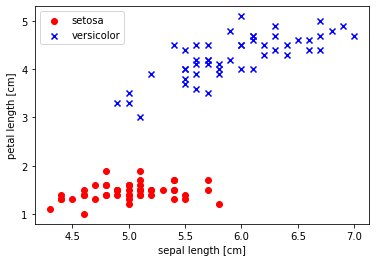

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
#df.tail()

#---------------------------------
# ****select setosa and versicolor****
y = df.iloc[0:100, 4].values
#print(y)
y = np.where(y == 'Iris-setosa', -1, 1 )
#print(len(y), list(y).count(-1))
#print(y)

#-------------------------------------------
# ****extract sepal lenght & petal lenght****
X = df.iloc[0:100, [0,2]].values
#print(X)


#-------------------------------------
# **** Plot data ****
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Fiting the model & Convergence plot

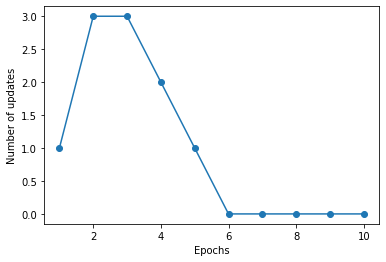

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

**Convenience function to visualize the decision boundaries**

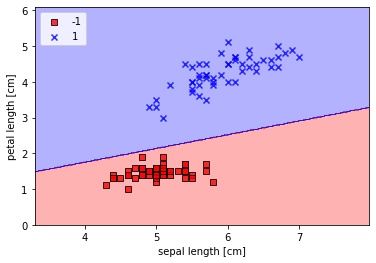

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black'
                    )

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

#Perceptron learning using scikit learn

loading & spliting data

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()

X = iris.data[:,[2,3]]
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)



What does stratify do?
Because of stratification after test_train_split method, train and test has the same proportions of class label as the input data set

In [2]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Feature scaling

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Fitting Perceptron learning model

In [5]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std,y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy %.2f' % ppn.score(X_test_std, y_test))

Misclassified samples: 1
Accuracy: 0.98
Accuracy 0.98


Plot of decision regions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


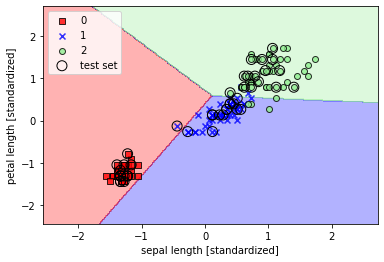

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions_sk(X, y, classifier, test_idx=None,resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black'
                    )
    if test_idx:
        #plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],c='', edgecolor='black', alpha=1.0,linewidth=1, marker='o',s=100, label='test set')


X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions_sk(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

